# NNGT example notebook

This notebook provides the following examples

* Basic graph creation
* Use of generation algorithms
* Using node and edge attributes
* Creation of complex networks containing various groups of neurons
* NEST interaction
* Space-embedded networks

Last update: 7/11/2017

## Required imports

In [1]:
#%matplotlib inline
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 6)

import numpy as np

import nngt
from nngt import generation as ng
from nngt import analysis as na
from nngt import plot as nplt

[INFO @ nngt.geometry]: Could not import dxftools: No module named dxfgrabber
[INFO @ nngt]: 
    -----------
    NNGT loaded
    -----------
Graph library:  graph-tool
Multithreading: False (1 thread)
Plotting:       True
NEST support:   NEST 2.12.0
Database:       False
    -----------



## Basic graph creation

In [2]:
''' Create an empty Graph '''
g = nngt.Graph()

In [3]:
''' Add nodes '''
g.new_node(10)  # create nodes 0, 1, ... to 9
g.node_nb()     # returns 10

10

In [4]:
''' Add edges between these nodes '''
g.new_edge(1, 4)  # create on connection going from 11 to 56
g.edge_nb()       # returns 1
g.new_edges([(0, 3), (5, 9), (9, 3)])
g.edge_nb()       # returns 4

4

## Node and edge attributes

In [5]:
''' Adding a node with attributes '''
g2 = nngt.Graph()
g2.new_node(attributes={'size': 2., 'color': 'blue'}, value_types={'size': 'double', 'color': 'string'})
g2.node_attributes

{'color': array(['blue'], dtype=object), 'size': array([ 2.])}

In [6]:
''' Adding several nodes with attributes '''
g2.new_node(3, attributes={'size': [4., 5., 1.], 'color': ['r', 'g', 'b']}, value_types={'size': 'double', 'color': 'string'})
g2.node_attributes

{'color': array(['blue', 'r', 'g', 'b'], dtype=object),
 'size': array([ 2.,  4.,  5.,  1.])}

In [7]:
''' Default filled if no attributes are provided '''
g2.new_node(3)
g2.node_attributes

{'color': array(['blue', 'r', 'g', 'b', None, None, None], dtype=object),
 'size': array([2.0, 4.0, 5.0, 1.0, None, None, None], dtype=object)}

In [8]:
''' Attributes can also be created afterwards '''
g3 = nngt.Graph(nodes=100)
g3.new_node_attribute('size', 'double', values=np.random.uniform(0, 20, 100))
g3.node_attributes

{'size': array([  6.97120874,   6.36159497,  11.31705205,   4.64960615,
         14.61897608,   9.75510468,  11.92726921,  16.84046095,
         18.01608475,  18.08537631,   0.73398321,   0.31905449,
         15.81280708,   4.48619484,  19.05287827,   9.18803831,
          7.9100094 ,   8.49128856,   8.29725551,  14.23787289,
          9.42278482,   1.59984978,   6.17734436,   8.7945845 ,
         16.0555756 ,  12.05871212,  10.45589943,  17.34024839,
         19.71536118,  17.58796378,  12.44542237,   0.79660016,
         14.03269753,   6.62457692,  19.58414423,   6.37211521,
         17.9510371 ,  14.50516122,   7.21329072,  15.17374385,
         17.04133982,   1.06324862,   2.53171668,  19.94258249,
          5.6002934 ,  19.01766685,   2.787134  ,  12.20724252,
         10.63910115,  19.39073062,  11.00119355,  11.50873461,
         13.57120023,  14.8442917 ,   6.87512446,   2.92526945,
          3.07519604,  13.71695732,   9.19753879,  14.42471012,
          5.73640513,  15.571617

In [9]:
edges = g3.new_edges(np.random.randint(0, 100, (50, 2)))
g3.new_edge_attribute('rank', 'int', val=0)
g3.set_edge_attribute('rank', val=2, edges=edges[:3, :])
g3.edge_attributes

{'rank': array([2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 'weight': array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])}

## Generating and analyzing more complex networks

NNGT provides a whole set of methods to connect nodes in specific fashions inside a graph.
These methods are present in the `nngt.generation` module, and the network properties can then be plotted and analyzed via the tools present in the `nngt.plot` and `nngt.analysis` modules.

NNGT implements some fast generation tools to create several of the standard
networks, such as

### Erdős-Rényi

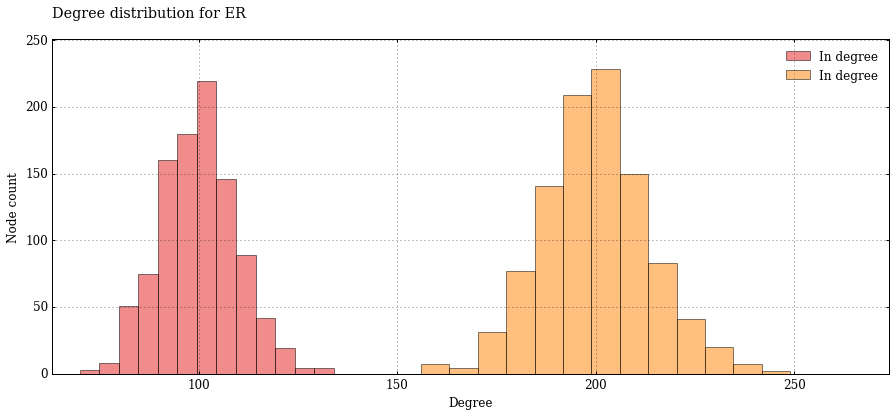

Clustering: 0.190201201802


In [6]:
'''
Create an Erdos-Renyi network,
then look at its in/total-degree distributions
and its clustering coefficient
'''
g = ng.erdos_renyi(nodes=1000, avg_deg=100)
nplt.degree_distribution(g, ('in', 'total'), show=True)
print("Clustering: {}".format(na.clustering(g)))

### Scale-free

More heterogeneous networks, with scale-free degree distribution (but no correlations like in Barabasi-Albert networks and user-defined exponents)

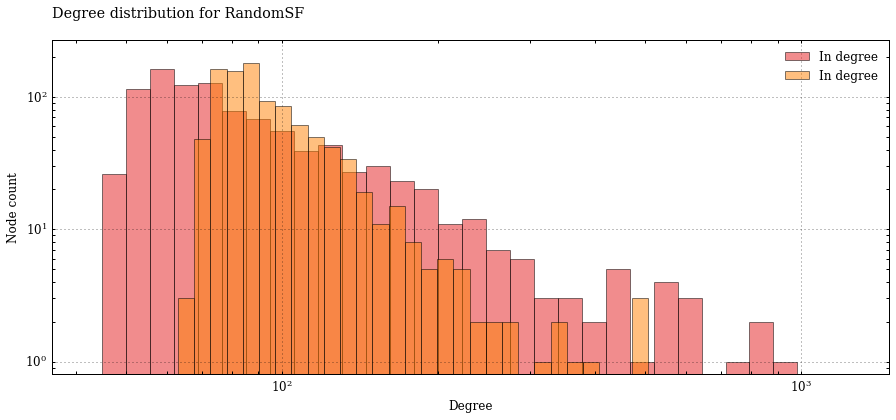

Clustering: 0.25987736704


In [7]:
''' Compare in/out-degree distributions + clustering '''
g = ng.random_scale_free(1.8, 3.2, nodes=1000, avg_deg=100)
nplt.degree_distribution(g, ('in', 'out'), num_bins=30, logx=True, logy=True, show=True)
print("Clustering: {}".format(na.clustering(g)))

## Towards realistic neuronal networks: neural groups and spatial embedding

NNGT provides two classes to deal with spatial embedding and neuronal properties: the ``SpatialGraph`` and ``Network`` classes, which can be combined to get a ``SpatialNetwork``, including both neuronal properties and spatial embedding.

### Creating groups of neurons with specific properties

The ``NeuralGroup`` class allows the user to create groups of neurons that share common electrophysiological and synaptic properties.

In [2]:
''' Create groups with different parameters '''
base_params = {'E_L': -60., 'V_th': -55., 'b': 10., 'tau_w': 100., 'V_reset': -65., 't_ref': 1., 'g_L': 10., 'C_m': 250.}
params1, params2, params3 = base_params.copy(), base_params.copy(), base_params.copy()
params1.update({'E_L': -65., 'b': 30., 'I_e': 350., 'tau_w': 400.})  # oscillators
params2.update({'b': 20., 'V_reset': -50., 'tau_w': 500.})           # bursters

g1 = nngt.NeuralGroup(nodes=400, model='aeif_psc_alpha', neuron_param=params1, syn_model='tsodyks2_synapse', syn_param={'U': 0.5})
g2 = nngt.NeuralGroup(nodes=200, model='aeif_psc_alpha', neuron_param=params2, syn_model='tsodyks2_synapse')
g3 = nngt.NeuralGroup(nodes=200, model='aeif_psc_alpha', neuron_param=params3, syn_model='tsodyks2_synapse')

''' Create the population that will represent the neuronal network from these groups '''
pop = nngt.NeuralPop.from_groups([g1, g2, g3], names=['oscillators', 'bursters', 'adaptive'])

''' Create the network from this population, using a Gaussian in-degree '''
net = nngt.generation.gaussian_degree(100., 15., population=pop, weights=1500.)

In [16]:
'''
Compare the properties across the different groups
(even though it makes little sense here since they
all belong to the same ER graph)
'''
# we will plot al them on the same axis
fig, ax = plt.subplots()

nplt.degree_distribution(net, nodes=pop['oscillators'].ids, axis=ax, color='r', label='osc.', alpha=0.5)
nplt.degree_distribution(net, nodes=pop['bursters'].ids, axis=ax, color='b', label='burst.', alpha=0.5)
nplt.degree_distribution(net, nodes=pop['adaptive'].ids, axis=ax, color='k', label='adapt.', alpha=0.5)

plt.show()

In [3]:
''' Create the network in NEST and monitor the activity '''
import nngt.simulation as ns
import nest

nest.ResetKernel()
nest.SetKernelStatus({'local_num_threads': 4})

# send the network to NEST
gids = net.to_nest()
# record each group separately
recorders, records = ns.monitor_groups(
    pop.keys(), net, ['spike_detector', 'multimeter'],
    [{}, {'record_from': ['V_m', 'w', 'I_syn_ex'], 'to_accumulator': True}])

# simulate
nest.Simulate(2000.)

# plot the resulting activity
ns.plot_activity(recorders, records, network=net, label=2*['oscillators', 'bursters', 'adaptive'], normalize=net.population)

plt.show()

([(801,), (802,), (803,), (804,), (805,), (806,)], ['spikes', ['V_m', 'w', 'I_syn_ex'], 'spikes', ['V_m', 'w', 'I_syn_ex'], 'spikes', ['V_m', 'w', 'I_syn_ex']])


In [4]:
''' Correcting the initial synchrony '''
import nngt.simulation as ns
import nest

rnd_states = {
    'V_m': ['uniform', -80., -60.],
    'w': ['uniform', 200., 2000.]
}

nest.ResetKernel()
nest.SetKernelStatus({'local_num_threads': 4})

gids = net.to_nest()
ns.randomize_neural_states(net, rnd_states)  # randomize potential and adaptation variable
recorders, records = ns.monitor_groups(pop.keys(), net)

nest.Simulate(2000.)

ns.plot_activity(recorders, records, network=net, label=['oscillators', 'bursters', 'adaptive'])
plt.show()